In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import random
import math
from IPython.core.debugger import set_trace

# How Much Information a Fault Injection Experiment Can Tell About the Resiliency of a Target Program.



How many different type of dynamic instruction when you try to make fault tolerance prediction?

In [2]:
# Dataset
dataset = "fft" # current available dataset fft, lu, cg

# Threshold that used to decide whether the final outcome is SDC or Masked.
threshold = 0.001

# The percentage of the test experiment over exhaust fault injections.
test_experiment_percentage = 0.05

# The fault injection campaign experiment
fault_injection_campaign = pd.read_csv("../static/data/fft/fft_injectlog.log",  sep=' ', names=['fileindex', 'file', 'linenum', 'variable','byte_num', 'corrupted','init_value','to', 'corrupt_value', 'mask', 'byte','expo', 'ss', 'op', 'diffnorm', 'empty'])

# Golden Run
golden_run = pd.read_csv("../static/data/fft/fft_complete/golden.log",  sep=' ', names=['file', 'linenum', 'variable', 'value'])

# Subset of fault injection campaign that used to verify the quality of a dynamic instruction
test_experiments = fault_injection_campaign.sample(frac=0.05, replace=False,  random_state=1)

C:\Users\zhimin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
# The number of fault injection experiments that a single fault injection can predict.
def single_prediction(fault_inject_run, golden_run, fault_injections, threshold = 0.001):
    
    if len(fault_inject_run) < len(golden_run):
        print("Bad fault injection experiment!")
        return False
    
    values = np.array(fault_inject_run.value[0:len(golden_run)], dtype="float") - np.array(golden_run.value, dtype="float")
        
    if np.isnan(values).any() or np.isinf(values).any():
        print("This experiment outcome is masked, but the propagation process contain nan or infinity event")
    
    for index, row in experiments.iterrows():
        instruction_index = int(row["byte_num"].split("#")[1])    
        boundary = float(row["corrupt_value"]) - float(row["init_value"])
        if (boundary[instruction_index] < 0 and inject_error > boundary[instruction_index]) || (boundary[instruction_index] >= 0 and inject_error < boundary[instruction_index]):    
            diffnorm = float(experiments.diffnorm[i])
            if diffnorm < threshold:
                positive_prediction += 1
            elif math.isnan(diffnorm) or math.isinf(diffnorm):
                crash += 1
            else:
                negative_prediction += 1
                
    return {"crash":crash/len(experiments), "positive": positive_prediction/len(experiments), "negative": negative_prediction/len(experiments)}
    
    #for j in range(len(golden_run)):                
    #    if values[j] >= 0 and values[j] > boundary[j]["max"]:
    #        boundary[j]["max"] = values[j]
                       
    #    if values[j] < 0 and values[j] < boundary[j]["min"]:
    #        boundary[j]["min"] = values[j] 
    
    #return prediction(test_experiments, boundary, 0.001)

    
    
    
#def prediction(experiments, boundary, threshold=0.001):
#    positive_prediction = 0
#    negative_prediction = 0
#    crash = 0
#    length = len(experiments)
    
#    for i in experiments.fileindex:
#        index = math.floor(i/64)
        
#        inject_error = float(experiments.corrupt_value[i]) - float(experiments.init_value[i])
    
#        if(inject_error > boundary[index]["min"] and inject_error < boundary[index]["max"]):
#            if float(experiments.diffnorm[i]) < threshold:
#                positive_prediction += 1
#            elif math.isnan(float(experiments.diffnorm[i])) or math.isinf(float(experiments.diffnorm[i])):
#                crash += 1
#            else:
#                negative_prediction += 1
#    return {"positive": positive_prediction/len(experiments), "negative": negative_prediction/len(experiments)}

In [12]:
list_indexs = []
experiments = pd.read_csv("../static/data/fft/fft_injectlog.log",  sep=' ', names=['fileindex', 'file', 'linenum', 'variable','byte_num', 'corrupted','init_value','to', 'corrupt_value', 'mask', 'byte','expo', 'ss', 'op', 'diffnorm', 'empty'])
diffnorm = np.array(experiments.diffnorm, dtype='float')

for i in range(64 * 1000, 64 * 1001):
    if diffnorm[i] < threshold and diffnorm[i] != 0:
        pre_res = single_prediction(i)
        if pre_res is False:
            continue
            
        if float(experiments.diffnorm[i]) != 0:
            list_indexs.append({"diffnorm":math.log10(float(experiments.diffnorm[i])), "index":i, "negative":pre_res['negative'], 'positive':pre_res['positive']})
        else:
            list_indexs.append({"diffnorm": 0, "index":i, "negative":pre_res['negative'], 'positive':pre_res['positive']})

C:\Users\zhimin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


8.94777307802741e-13
2.2473203853401458e-12
2.247542429945071e-12
3.604602727413919e-12
4.1816966556140756e-12
4.100282613439532e-12
4.597058844701962e-12
9.447165272291613e-12
1.8871078311111233e-11
3.769494438810028e-11
7.579140093305625e-11
1.5130354608094976e-10
3.023940958746252e-10
6.051000117635041e-10
1.2099156468381445e-09
2.42007615336437e-09
4.839906378450998e-09
9.679954289520953e-09
1.9359616791614354e-08
3.871948586059437e-08
7.743929624631773e-08
1.5487851135614905e-07
3.0975691703988284e-07
6.195139527903626e-07
1.2390278886845185e-06
2.478055385876643e-06
4.956111378788541e-06
9.91222209512782e-06
1.982444451384402e-05
3.964888879012807e-05
7.929777748042627e-05
0.00015859555501199912
0.00031719111011246914
0.000634382220015911
0.0012687644398121228
0.0025375288799385567
0.005075057759953573
0.010150115519727713
0.02030023103955913
0.0406004620790905
0.0812009241581737
0.16240184831577958
0.32480369663221575
0.6496073932642014
1.2992147865281385
2.5984295730568636
5.19

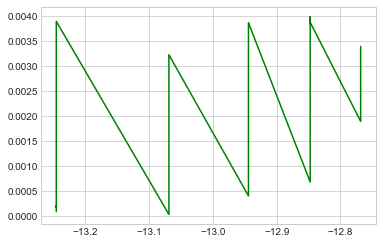

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
list_indexs = sorted(list_indexs, key = lambda i: i['diffnorm']) 

x = []
y = []
z = []
for i in range(len(list_indexs)):
    x.append(list_indexs[i]['diffnorm'])
    y.append(list_indexs[i]['positive'])
    z.append(list_indexs[i]['negative'])

plt.plot(x, y, color='green')

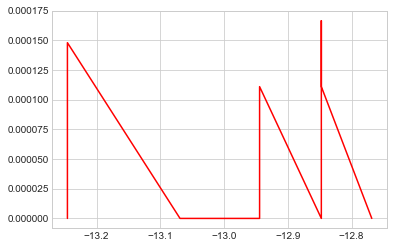

In [18]:
plt.plot(x, z, color='red')

In [2]:
golden_run_path = "../static/data/cg/cg_in8/golden.log"
golden_run = pd.read_csv(golden_run_path,  sep=' ', names=['file', 'linenum', 'variable', 'value'], header=0)
golden_run_value = np.array(golden_run.value, dtype='float')
cg_fault_injection = pd.read_csv("../static/data/cg_in8.csv")
SIZE = len(cg_fault_injection)
print(SIZE)

51904


# Experiment 1 -- CG
Take all the fault injections in the inital condition. Find all the fault injection cases that result into masked. For each masked case, compare error run with the golden run to get a error run curve. Combine all the error run curve to construct a error boundary for masked and SDC.

In [ ]:
cg_fault_injection_experiment = pd.read_csv('matrix/in10_data/in10/injectlog.log',  sep=' ', names=['file', 'linenum', 'variable','byte_num', 'corrupted','init_value','to', 'corrupt_value', 'mask', 'byte','expo', 'ss', 'op', 'diffnorm', 'empty'])

### SDC Ratio over entire program

In [ ]:
iters = list(cg_fault_injection.iter)
iters.reverse()
count  = 0
last_zero_iteration_index = SIZE - iters.index(0)
dynamic_step_to_record_computation_result = int(last_zero_iteration_index/64)

for i in range(last_zero_iteration_index, len(iters)):
    if cg_fault_injection.outcome[i] == "SDC":
        count += 1

print("SDC ratio over entire program: ", count/len(iters))

In [ ]:
#only tracking the maximum value of the masked run after this time step.
tracking_length = len(golden_run_value)

def construct_boundary(number_of_dynamic_instruction):
    boundary = []
    ground_truth = {"Masked": 0, "SDC":0, "DUE":0}

    for i in range(tracking_length):
        boundary.append({'max':0, 'min':0})

    for i in range(number_of_dynamic_instruction):
        index = int(random.random() * SIZE)
        
        ground_truth[cg_fault_injection.outcome[index]] += 1
        
        if cg_fault_injection.outcome[index] == "Masked":
            masked_run_path = "cg_simulation/appstate_"+ str(index)+".log" 

            #Check whether the tracking file is on the path
            #TODO: check whether can regenerate the data
            if not os.path.isfile(masked_run_path):
                continue

            masked_run = pd.read_csv(masked_run_path,  sep=",", names=['file', 'linenum', 'variable', 'value'], header=0)
            masked_run_value = np.array(masked_run.value, dtype='float')
            
            #This is a werid information in the data.
            #TODO: may check why such outcome is shown
            if len(masked_run_value) < tracking_length:
                print("odd!")
                continue
            
            #array contain NAN, ignore the run
            if np.isnan(np.min(masked_run_value)):
                continue
            
            comparision_result = masked_run_value[0:tracking_length] - golden_run_value
        else:
            continue
        
        
        for j in range(dynamic_step_to_record_computation_result, tracking_length):
            if comparision_result[j] > boundary[j]['max'] and comparision_result[j] >= 0:
                boundary[j]['max'] = comparision_result[j]

            if comparision_result[j] < boundary[j]['min'] and comparision_result[j] < 0:
                boundary[j]['min'] = comparision_result[j]
                
    return [boundary, ground_truth]

def predict(boundary):
    masked_true_positive = 0
    masked_false_positive = 0
    sdc_true_positive = 0
    sdc_false_positive = 0
    result = {}

    for i in range(last_zero_iteration_index + 1, SIZE):
        index = math.floor(i/64)
        if cg_fault_injection.out_xor[i] < boundary[index]['max'] and cg_fault_injection.out_xor[i] > boundary[index]['min']:
            if cg_fault_injection.outcome[i] == "Masked":
                masked_true_positive += 1
            else:
                masked_false_positive += 1
        else:
            if cg_fault_injection.outcome[i] == "SDC":
                sdc_true_positive += 1
            else:
                sdc_false_positive += 1

    result["predict masked case"] =  (masked_true_positive + masked_false_positive)/SIZE
    result["predict SDC case"] = (sdc_true_positive + sdc_false_positive)/SIZE
    result["masked prediction accuracy"] = masked_true_positive/(masked_true_positive + masked_false_positive)
    result["SDC prediction accuracy"] = sdc_true_positive/(sdc_true_positive + sdc_false_positive)
    
    return result

## Can we think this as a lable propagation problem?

In [ ]:
experiments = []

ground_truth = []

for i in range(10):
    print(i)
    boundary = construct_boundary(2000)    
    experiments.append(predict(boundary[0]))
    ground_truth.append(boundary[1])

    
uniform_test = []
intuition = []

for i in range(10):
    intuition.append(experiments[i]['predict SDC case'])
    uniform_test.append(ground_truth[i]['SDC']/2000)

print(np.mean(intuition))
print(intuition)
print(np.mean(uniform_test))

# Experiment 2 -- FFT

In [2]:
path = "../static/data/cg/cg_in8/"
golden_run_path = path+"golden.log"
golden_run = pd.read_csv(golden_run_path,  sep=' ', names=['file', 'linenum', 'variable', 'value'])
golden_run_value = np.array(golden_run.value, dtype='float')
fault_injection_experiment = pd.read_csv(path+'injectlog.log',  sep=' ', names=['file', 'linenum', 'variable','byte_num', 'corrupted','init_value','to', 'corrupt_value', 'mask', 'byte','expo', 'ss', 'op', 'diffnorm', 'empty'])
SIZE = len(fault_injection_experiment)
threshold = 0.001

In [3]:
def load_data(path):
    
    golden_run_path = path + "golden.log"
    golden_run = pd.read_csv(golden_run_path,  sep=' ', names=['file', 'linenum', 'variable', 'value'])
    golden_run_value = np.array(golden_run.value, dtype='float')
    fault_injection_experiment = pd.read_csv(path+"injectlog.log",  sep=' ', names=['file', 'linenum', 'variable','byte_num', 'corrupted','init_value','to', 'corrupt_value', 'mask', 'byte','expo', 'ss', 'op', 'diffnorm', 'empty'])
    
    return [golden_run,fault_injection_experiment]

def SDC_ratio(experiments): 
    sdc_count = 0
    for i in range(0, len(experiments)):
        if float(experiments.diffnorm[i]) > threshold:
            sdc_count += 1
    
    return sdc_count / len(experiments)

def getBoundary(golden_run, percent, experiments, path):
    boundary = []
    nums = int(len(experiments) * percent)
    
    print(nums)

    for i in range(len(golden_run)):
        boundary.append({"min": 0, "max":0})

    for i in range(nums):
        
        diffnorm = float(experiments.diffnorm[i])
        if diffnorm > threshold or math.isnan(diffnorm) or math.isinf(diffnorm):
            continue
        
        index = int(random.random() * len(experiments))

        file_path = path+"appstate_"+str(index)+".log"
    
        fault_inject_run = pd.read_csv(file_path,  sep=' ', names=["file", "linenum", "variable", "value"])
    
        if len(fault_inject_run) < len(golden_run):
            print("weird!")
            continue
    
        values = np.array(fault_inject_run.value[0:len(golden_run)], dtype="float") - np.array(golden_run.value, dtype="float")
    
        for j in range(len(golden_run)):              
            
            if values[j] >= 0 and values[j] > boundary[j]["max"]:
                boundary[j]["max"] = values[j]
                       
            if values[j] < 0 and values[j] < boundary[j]["min"]:
                boundary[j]["min"] = values[j] 
    
    return boundary

def prediction(experiments, boundary, threshold=0.001):
    positive_prediction = 0
    negative_prediction = 0
    crash = 0
    length = len(experiments)
    
    for i in experiments.fileindex:
        index = math.floor(i/64)
        
        #print(i)
        
        inject_error = float(experiments.corrupt_value[i]) - float(experiments.init_value[i])
    
        if(inject_error > boundary[index]["min"] and inject_error < boundary[index]["max"]):
            if float(experiments.diffnorm[i]) < threshold:
                positive_prediction += 1
            elif math.isnan(float(experiments.diffnorm[i])) or math.isinf(float(experiments.diffnorm[i])):
                crash += 1
            else:
                negative_prediction += 1
    return {"positive": positive_prediction/len(experiments), "negative": negative_prediction/len(experiments), "Crash": crash/len(experiments)}

# Predict Result of 20 x 20 Matrix

In [4]:
#golden_run, experiments = load_data(path)
#boundary = getBoundary(golden_run, 0.0001, experiments, path)
#experiments = pd.read_csv("../static/data/cg/cg_in8/injectlog.log",  sep=' ', names=['file', 'linenum', 'variable','byte_num', 'corrupted','init_value','to', 'corrupt_value', 'mask', 'byte','expo', 'ss', 'op', 'diffnorm', 'empty'])
#print(len(experiments))

# Using 6400 fault injections run in FFT to test the masked case. 

In [ ]:
boundary = []

for i in range(len(golden_run)):
    boundary.append({"min": 0, "max":0})

for i in range(8400):
    
    if fault_injection_experiment.diffnorm[i] > 0.07:
        continue
    
    index = int(random.random() * len(fault_injection_experiment))

    file_path = "matrix/in27_data/in27/appstate_"+str(index)+".log"
    
    fault_inject_run = pd.read_csv(file_path,  sep=' ', names=["file", "linenum", "variable", "value"])
    
    if len(fault_inject_run) < len(golden_run):
        print("weird!")
        continue
    
    values = np.array(fault_inject_run.value[0:len(golden_run)], dtype="float") - np.array(golden_run.value, dtype="float")
    
    for j in range(len(golden_run)):
        if values[j] >= 0 and values[j] > boundary[j]["max"]:
            boundary[j]["max"] = values[j]
                       
        if values[j] < 0 and values[j] < boundary[j]["min"]:
            boundary[j]["min"] = values[j] 

In [ ]:
positive_prediction = 0
negative_prediction = 0
for i in range(len(fault_injection_experiment.diffnorm)):
    
    index = math.floor(i/64)
    
    #if i%64 <= 52:
    #    continue
    
    inject_error = float(fault_injection_experiment.corrupt_value[i]) - float(fault_injection_experiment.init_value[i])
    
    if(inject_error > boundary[index]["min"] and inject_error < boundary[index]["max"]):
        if fault_injection_experiment.diffnorm[i] < 0.07:
            positive_prediction += 1
        else:
            negative_prediction += 1

In [ ]:
#relative error and absolute error
#for i in range(len(golden_run_value)):
#   if golden_run_value[i] != 0:
#        absolute = abs(golden_run_value[i] -  masked_run_value[i])

false_positive = 0
true_positive = 0
unsure = 0
total = (811 - 160) * 64
for i in range(160, 811):
    diff = abs(golden_run_value[i] -  masked_run_value[i]) 
    for b in range(64):
        if diff > abs(cg_fault_injection.out_xor[i * 64 + b]) and cg_fault_injection.outcome[i * 64 + b] != "Masked":
            #print(cg_fault_injection.diffnormr[i * 64 + b], cg_fault_injection.Variable[i * 64 + b], (diff - abs(cg_fault_injection.out_xor[i * 64 + b])))
            false_positive += 1
            print(i * 64 + b)
        elif diff > abs(cg_fault_injection.out_xor[i * 64 + b]) and cg_fault_injection.outcome[i * 64 + b] == "Masked":
            true_positive += 1
        else:
            unsure += 1
    
    #sdc_diff = abs(golden_run_value[i] -  sdc_run_value[i])
    #for b in range(64):
    #    if sdc_diff < abs(cg_fault_injection.out_xor[i * 64 + b]) and cg_fault_injection.outcome[i * 64 + b] != "SDC":
    #        false_positive += 1
    #    elif sdc_diff < abs(cg_fault_injection.out_xor[i * 64 + b]) and cg_fault_injection.outcome[i * 64 + b] == "SDC":
    #        true_positive += 1
    #    else:
    #        unsure +=1
            
print(false_positive/total)
print(true_positive/total)
print(unsure/total)
    
#print(i, cg_fault_injection.Variable[i], cg_fault_injection.out_xor[i], cg_fault_injection.outcome[i])
#for i in range(243*64,244*64):
#    print(i,cg_fault_injection.Variable[i], cg_fault_injection.out_xor[i], cg_fault_injection.outcome[i])
#print(golden_run_value[243])
#print(len(cg_fault_injection))
#golden_run_value-error_run_value[0:811]

In [ ]:
number_of_instructions = {}

propagation_path = []

for index in range(100):
    if index in[15731, 16246, 17523]:
        continue
    
    file_path = "cg_simulation/appstate_"+str(index)+".log"
    error_run = pd.read_csv(file_path,  sep=' ')
    
    
    #For different fault injection case, what is the number of different execution dynamic instructions
    if len(error_run) in number_of_instructions:
        number_of_instructions[len(error_run)] += 1
    else:
        number_of_instructions[len(error_run)] = 1
        
    #
    index = min(len(golden_run), len(error_run))
    #result = np.array(golden_run.value, dtype=float)[:index] - np.array(error_run.value, dtype=float)[:index]
    #propagation_elements = golden_run.line[np.where(result != 0)[0]]
    
    #path = "=>"
    #number_of_propagation_element = 5
    #for e in propagation_elements:
    #    if str(e) not in path:
    #        path += str(e)
    #        path += "=>"
    #        number_of_propagation_element -= 1
        
    #    if number_of_propagation_element == 0:
    #        break
    #if path not in propagation_path:
    #    propagation_path.append(path)

## What is the probability of the different number of storing dynamic instructions.
## What is the probability of SDC.

It's expected that if the program ends early, then there an unexpected crash during the program execution in the earlier stage. At the same time, if the program has more execution than it expected. It will have high chance causes silent data corruption.

In [ ]:
cg_outcome = cg_fault_injection['outcome'].value_counts()

print(cg_outcome)
print(sum(cg_outcome))
#propagation_path

In [ ]:
number_of_instructions

# If you want to rewrite your code.

4. interactive fault injection campaign.

### 1. A sensitive analysis across the whole program with a mapping framework.
A desity scatter plot to understand the input and output sensitivity of the program. User can selective choose the high sensitive data and mapping back to the original visualization.
    
    a. how many clusters in the plot.
    
    b. Where is each of them comes from. 
    
    c. The sample that comes from the fault injection in same location.

#### 2. Explore function level resiliency of the program. What's the difference compare to the source code level?

    a.Explore the resiliency of different program component. Aggregate the data in variable level


#### 3. How to measure the impact of one variable/function over the other?
 


# The number of times a function is called.

In [ ]:
counter = {}

line_to_func = {167:'readA', 175:'readB', 33:'waxpby', 25:'matvec', 48:'dot_r2', 75:'solve_cg', 76:'solve_cg',87:'solve_cg',57:'dot', 90:'solve_cg',91:'solve_cg',40:"daxpby", 82:'daxpby',83:'daxpby',84:'daxpby'}

for index, row in golden_run.iterrows():
    key = line_to_func[row['line']]
    if key not in counter:
        counter[key] = 1
    else:
        counter[key] += 1

In [ ]:
number_of_instruction = sum(list(counter.values()))
for item in counter.items():
    print(item[0], item[1]/number_of_instruction * 100)

# Error Propagation Analysis in one program component.

In [ ]:
golden_run_path = "cg_simulation/golden.log"
golden_run = pd.read_csv(golden_run_path,  sep=' ', names=['file', 'linenum', 'variable', 'value'])
golden_run_value = np.array(golden_run.value)
##### this is a very interesting but werid case
##### There is a NAN occur during the computation, but the  error is masked at the end.
#index_range = [17341, 24381]

##### cg p_ap_dot first interation 64 experiment
#index_range = [15552, 15603]

#file_path = "cg_simulation1/appstate_"+str(17341)+".log"
#error_run = pd.read_csv(file_path,  sep=' ')

#for i in range(len(error_run.value)):
#    print(error_run.line[i], error_run.variable[i], error_run.value[i])
#print(len(error_run.value))

#print(error_run)
#data_set = {}


#golden_run_value = np.array(golden_run.value[0:800], dtype='float')

#for index in range(index_range[0], index_range[1]+1):
#    file_path = "cg_simulation/appstate_"+str(index)+".log"
#    error_run = pd.read_csv(file_path,  sep=' ', names=['file', 'linenum', 'variable', 'value'])

#    data_set[index] = golden_run_value - np.array(error_run.value[0:800], dtype='float')


##### a specific case line 75 case 10290
##### a specific case line 75 case 10296
indexs =  [10290, 10274]# 10288] #10297]# 10296, 10289]

delta_x = [65536, 1.0]# 1321922331132047.5]#, -307779.3308780107]
x_data = range(0, 811, 1)

for index,item in enumerate(indexs): 
    file_path = "cg_simulation/appstate_"+str(item)+".log"
    error_run = pd.read_csv(file_path,  sep=' ', names=['file', 'linenum', 'variable', 'value'])
    error_run_value = np.array(error_run.value)

    sensitivity_val = (error_run_value[0:811] - golden_run_value[0:811])/delta_x[index]
    sns.lineplot(x=x_data, y=sensitivity_val, sort=False, lw=1)
    
print(sensitivity_val.argmax())

In [ ]:
#for index in range(index_range[0], index_range[1]+1):
#    print(len(data_set[index].values))
#data_set[index] = golden_run.values - error_run.values   


x_data = range(0,811,1)
sns.lineplot(x=x_data, y=sensitivity_val, sort=False, lw=1)

#for index in range(index_range[0], index_range[0]+20): 
#    sns.lineplot(x=x_data, y=data_set[index], sort=False, lw=1)

## What role the truncation error is playing in the propagation analysis
## What's the threshold of different program components.
## How much error is masked by the truncate error and How much error is masked by the model feature